# WeatherPy
----

### Analysis
*Temperature is warmer near the equator

*no major relationship between latitude and Cloudiness or Windspeed



In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import csv
# Import API key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy
from api_keys import gkey



# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [6]:
# List for holding lat_lngs and cities
combo=[]
lts=[]
lgs=[]
cntry=[]
# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1])
    cityname=city.city_name
    country=city.country_code

    # If the city is unique, then add it to a our cities list
    if cityname not in combo:
            combo.append(cityname)
            cntry.append(country)

len(combo)
cities_df=pd.DataFrame()
cities_df['City'] = combo
cities_df['Country']= cntry
cities_df.head()


,City,Country
0,mataura,pf
1,arraial do cabo,br
2,palora,ec
3,matadi,cd
4,lucea,jm


In [7]:
citycnt = 0 

base_url = "http://api.openweathermap.org/data/2.5/weather?"
city_lst = []

print(f"Beginning Data Retrieval")
print("------------")

for index, row in cities_df.iterrows():
    citycnt +=1
    # add keyword to params dict
    citi = row['City']
    ctry = row['Country']
    params = {'appid': gkey,
              'q': citi+","+ctry,
              'units' : 'imperial',
              }   
    try: 
        response = requests.get(base_url, params=params).json()
          
        #if(response):
        
        # extract results
        # Alternative method instead of using try/except, use .get() to retrieve results if exist.  If does not the results
        # variable returns None by default.  
        # if the results is not None, then the if statement is triggered.
        print(f"Processing Record {citycnt} | {citi} {ctry}")
        city_lst.append({'City':response['name'],
                        'Clouds': response['clouds']['all'],
                        'Country': response['sys']['country'],
                        'Date': response['dt'],
                        'Humidity': response['main']['humidity'],
                        'Longitude': response['coord']['lon'],
                        'Latitude': response['coord']['lat'],
                        'Max Temp': response['main']['temp_max'],
                        'Wind': response['wind']['speed']})
   
    #City Cloudiness Country Date Humidity Lat Lng Max Temp  Wind Speed
    except:
        print(f"City not found. Skipping...")
        continue      
print("-----------------------------")
print("Data Retrieval Complete")      
print("-----------------------------")

Beginning Data Retrieval
------------
Processing Record 1 | mataura pf
City not found. Skipping...
Processing Record 2 | arraial do cabo br
Processing Record 3 | palora ec
Processing Record 4 | matadi cd
Processing Record 5 | lucea jm
Processing Record 6 | sinnamary gf
Processing Record 7 | fortuna us
Processing Record 8 | ushuaia ar
Processing Record 9 | te anau nz
Processing Record 10 | rikitea pf
Processing Record 11 | kruisfontein za
Processing Record 12 | akureyri is
Processing Record 13 | kaitangata nz
Processing Record 14 | turukhansk ru
Processing Record 15 | athens us
Processing Record 16 | punta arenas cl
Processing Record 17 | hermanus za
Processing Record 18 | sechura pe
Processing Record 19 | biak id
Processing Record 20 | new norfolk au
Processing Record 21 | broken hill au
Processing Record 22 | kokoda pg
Processing Record 23 | mar del plata ar
Processing Record 24 | mareeba au
Processing Record 25 | grand river south east mu
City not found. Skipping...
Processing Record

Processing Record 208 | semporna my
Processing Record 209 | gayny ru
Processing Record 210 | karasburg na
Processing Record 211 | puerto escondido mx
Processing Record 212 | juneau us
Processing Record 213 | cururupu br
Processing Record 214 | hudson bay ca
Processing Record 215 | bom jesus br
Processing Record 216 | nantucket us
Processing Record 217 | iracoubo gf
Processing Record 218 | rio pardo de minas br
Processing Record 219 | chuy uy
Processing Record 220 | visnes no
Processing Record 221 | saint george bm
Processing Record 222 | yarmouth ca
Processing Record 223 | metehara et
City not found. Skipping...
Processing Record 224 | samarai pg
Processing Record 225 | dzhusaly kz
City not found. Skipping...
Processing Record 226 | fort frances ca
Processing Record 227 | kodiak us
Processing Record 228 | laguna br
City not found. Skipping...
Processing Record 229 | puerto del rosario es
Processing Record 230 | nouadhibou mr
Processing Record 231 | emerald au
Processing Record 232 | ab

Processing Record 410 | pangnirtung ca
Processing Record 411 | prabumulih id
Processing Record 412 | pisco pe
Processing Record 413 | jabiru au
City not found. Skipping...
Processing Record 414 | khani ru
City not found. Skipping...
Processing Record 415 | haradok by
Processing Record 416 | bam ir
Processing Record 417 | qasigiannguit gl
Processing Record 418 | porto novo cv
Processing Record 419 | karur in
Processing Record 420 | gornopravdinsk ru
Processing Record 421 | san jeronimo mx
Processing Record 422 | gurskoye ru
City not found. Skipping...
Processing Record 423 | rajpipla in
Processing Record 424 | richards bay za
Processing Record 425 | jalu ly
Processing Record 426 | bartica gy
Processing Record 427 | brigantine us
Processing Record 428 | nizhniy tsasuchey ru
Processing Record 429 | pyaozerskiy ru
Processing Record 430 | yeehaw junction us
City not found. Skipping...
Processing Record 431 | mandalgovi mn
Processing Record 432 | sept-iles ca
Processing Record 433 | yulara a

Processing Record 619 | qaqortoq gl
Processing Record 620 | regina ca
Processing Record 621 | saint-francois gp
Processing Record 622 | celestun mx
Processing Record 623 | ulladulla au
Processing Record 624 | yenagoa ng
Processing Record 625 | kutum sd
Processing Record 626 | huambo ao
Processing Record 627 | paamiut gl
Processing Record 628 | luanda ao
Processing Record 629 | kemin kg
Processing Record 630 | zabaykalsk ru
Processing Record 631 | plackovci bg
City not found. Skipping...
Processing Record 632 | penzance gb
Processing Record 633 | severnoye ru
Processing Record 634 | bairiki ki
City not found. Skipping...
Processing Record 635 | ballina au
-----------------------------
Data Retrieval Complete
-----------------------------


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [8]:
city_df1=pd.DataFrame(city_lst)
city_df1.to_csv('.//CityDataWeatherPy.csv')


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:
city_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 554 entries, 0 to 553
Data columns (total 9 columns):
City         554 non-null object
Clouds       554 non-null int64
Country      554 non-null object
Date         554 non-null int64
Humidity     554 non-null int64
Latitude     554 non-null float64
Longitude    554 non-null float64
Max Temp     554 non-null float64
Wind         554 non-null float64
dtypes: float64(4), int64(3), object(2)
memory usage: 39.0+ KB


In [10]:
city_df1.head()

,City,Clouds,Country,Date,Humidity,Latitude,Longitude,Max Temp,Wind
0,Arraial do Cabo,40,BR,1553119200,74,-22.97,-42.02,80.60,9.17
1,Palora,75,EC,1553119200,94,-1.70,-77.97,75.20,4.70
2,Matadi,80,CD,1553122967,100,-5.83,13.46,75.63,3.74
3,Lucea,40,JM,1553122813,74,18.44,-78.17,81.00,10.29
4,Sinnamary,100,GF,1553123056,100,5.38,-52.96,78.15,10.22


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

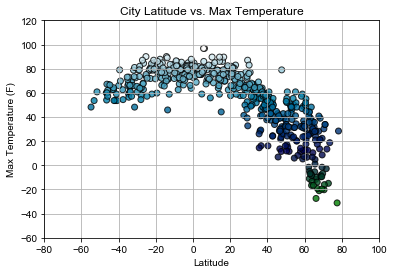

In [11]:
#Build a scatter plot for Latitude vs. Temperature

plt.scatter(city_df1["Latitude"], city_df1["Max Temp"]
            ,cmap="ocean" , c=city_df1["Max Temp"] ,edgecolor="black"
            , linewidths=1, marker="o", alpha=0.8, label="City")
#Incorporate the other graph properties

#
plt.style.use('seaborn') 
plt.title(f"City Latitude vs. Max Temperature") 
plt.ylabel("Max Temperature (F)") 
plt.xlabel("Latitude") 
plt.grid(True)
plt.xlim([-80, 100])
plt.ylim([-60, 120])
#Save the figure

plt.savefig("./Latitude_Temperature.png")
#Show plot

plt.show()


#### Latitude vs. Humidity Plot

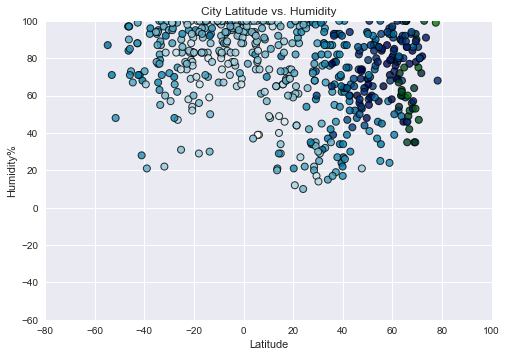

In [12]:


plt.scatter(city_df1["Latitude"], city_df1["Humidity"]
            ,cmap="ocean" , c=city_df1["Max Temp"] ,edgecolor="black"
            , linewidths=1, marker="o", alpha=0.8, label="City")



plt.style.use('seaborn') 
plt.title(f"City Latitude vs. Humidity") 
plt.ylabel("Humidity%") 
plt.xlabel("Latitude") 
plt.grid(True)
plt.xlim([-80, 100])
plt.ylim([-60, 100])
#Save the figure

plt.savefig("./Latitude_Humidity.png")
#Show plot

plt.show()

#### Latitude vs. Cloudiness Plot

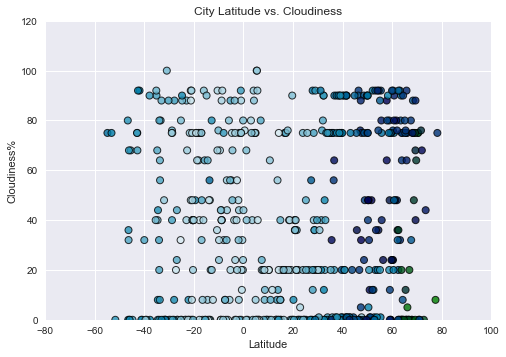

In [13]:


plt.scatter(city_df1["Latitude"], city_df1["Clouds"]
            ,cmap="ocean" , c=city_df1["Max Temp"] ,edgecolor="black"
            , linewidths=1, marker="o", alpha=0.8, label="City")

#
plt.style.use('seaborn') 
plt.title(f"City Latitude vs. Cloudiness") 
plt.ylabel("Cloudiness%") 
plt.xlabel("Latitude") 
plt.grid(True)
plt.xlim([-80, 100])
plt.ylim([0, 120])
#Save the figure

plt.savefig("./Latitude_Clouds.png")
#Show plot

plt.show()

#### Latitude vs. Wind Speed Plot

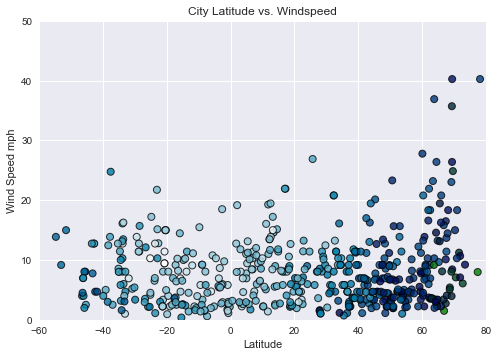

In [49]:


plt.scatter(city_df1["Latitude"], city_df1["Wind"]
            ,cmap="ocean" , c=city_df1["Max Temp"] ,edgecolor="black"
            , linewidths=1, marker="o", alpha=0.8, label="City")



plt.style.use('seaborn') 
plt.title(f"City Latitude vs. Windspeed") 
plt.ylabel("Wind Speed mph") 
plt.xlabel("Latitude") 
plt.grid(True)
plt.xlim([-60, 80])
plt.ylim([0, 50])
#Save the figure

plt.savefig("./Latitude_WindSpeed.png")
#Show plot

plt.show()